# SADID ASSIGNMENT 3

# TASK ONE: CALL CENTER

In [3]:
import numpy as np
import pystan
import scipy.stats as sts
import matplotlib.pyplot as plt
# importing necessary libraries

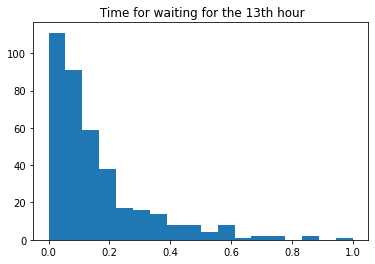

In [4]:
# we utilize the code from my own Assignment 2 (Hasan, 2021)
call_center = np.loadtxt("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00124343-8397/call-center.csv")
#using the numpy library to store the call center data

#in class breakouts, we found the case for one hour
hour_wise_wait_times = [[] for _ in range(24)]
# now we will process the data for 24 hours of the day by creating empty lists
# for each hour

time_now = 0
#we set the present time to 0, to start our calculations

for i in call_center:
    #creating a for loop in our call center data
    present_time = int(time_now // 60)
    #present time refers to the hour of the day
    #time_now refers to the exact time of the day
    time_now += i
    # we run the time now and add each step after another
    hour_wise_wait_times[present_time].append(i)
    #for every hour of the day, we append the waiting times
    
#According to the prompt, we need to consider the 13th hour in calculations
relevant_time = 13
store_wtime = hour_wise_wait_times[relevant_time]

#now we create a plot to demonstrate the data visualization
plt.hist(store_wtime, bins=18)
plt.title(f' Time for waiting for the {relevant_time}th hour')
plt.show()

In [5]:
#In the process of creating the Stan model, we need to input the data
# according to our given prompt for the task one
cc_data_entry = {
    'prompt_13':{
      'call_number': len(store_wtime), # total number of received calls
      'time_for_waiting': store_wtime,  #time for waiting at the 13th hour
      'alpha_given': 1,  
      'beta_given': 0.25 #according to the prompt
                         #we were given the following values for our hyperparameters 
    }
}

In [6]:

creating_stan = """

data {                             // In Stan, we will demonstrate three parts of our model,
                                   // the data part, the parameter part and the model
                                   // Together they complete our required model for analysis
    real<lower=0> alpha_given;                     
    real<lower=0> beta_given;      // given values of our hyper parameters
    int<lower=1> call_number;      // total call number for hour 13
    real<lower=0> time_for_waiting[call_number];   // time for waiting in each call of the hour 13
}


parameters {
    real<lower=0> exp_parameter;   // exp_parameter represents the exponential rate parameter
}

model {
    exp_parameter ~ gamma(alpha_given, beta_given); //creating the model for our gamma distribution
    for(num in 1:call_number) {
        time_for_waiting[num] ~ exponential(exp_parameter);      
                                                    // Multiply likelihood data with exp_paramenter
                                                    // finally creating three parts of the model and compiling them
                                                    
    }
}
"""

In [7]:
# NOW WE COMPLETE COMPILATION OF OUR CREATED MODEL 

compiled_stan = pystan.StanModel(model_code = creating_stan)
#using pystan, we use the creating_stan to compile our model
# then we name it "compiled_stan"

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_42bcbcae3aaea403d4b00053fbc11b56 NOW.
C:\Users\sadid\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\sadid\AppData\Local\Temp\tmpvdvsyq6i\stanfit4anon_model_42bcbcae3aaea403d4b00053fbc11b56_1140129559813690490.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [8]:
#NOW WE STORE OUR RESULTS FROM CONDUCTING SAMPLING OF OUR MODEL

stored_stan = compiled_stan.sampling(data = cc_data_entry['prompt_13'])

#we for posterior samples from our "alpha_given" and "beta_given parameters"
# and then compile results for the hour 13

In [9]:
# time to show our results
print(stored_stan)

Inference for Stan model: anon_model_42bcbcae3aaea403d4b00053fbc11b56.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
exp_parameter   6.34  8.1e-3   0.32   5.73   6.11   6.33   6.54   7.01   1585    1.0
lp__          324.43    0.02   0.71 322.37 324.28  324.7 324.87 324.92   1856    1.0

Samples were drawn using NUTS at Fri Feb 19 21:09:12 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [10]:
#for the posterior confidence interval of 98 percent
print(stored_stan.stansummary(probs=[0.01, 0.99], pars=['exp_parameter']))
# we need to adjust the confidence interval for exp_parameter)

#we take the exp_parameter and take the stansummary command to carry out the calculations

Inference for Stan model: anon_model_42bcbcae3aaea403d4b00053fbc11b56.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                mean se_mean     sd     1%    99%  n_eff   Rhat
exp_parameter   6.34  8.1e-3   0.32   5.62   7.13   1585    1.0

Samples were drawn using NUTS at Fri Feb 19 21:09:12 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


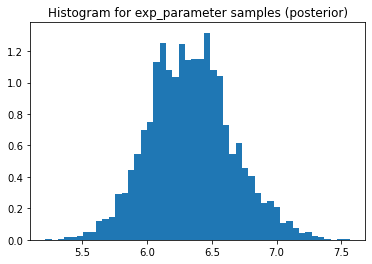

In [11]:
# we collect the sample posterior and plot the histogram
sample_collection = stored_stan.extract()
# storing the samples using the extract function
plt.hist(sample_collection['exp_parameter'], bins=48, density = True)
# deriving the exp parameter samples 
plt.title('Histogram for exp_parameter samples (posterior)')
#and plotting them in the histogram with density
plt.show()

In [12]:
#Now we find the 98 percent Confidence interval for our results
print("For the exp_parameter we find the 98 percent confidence interval:",
      np.percentile(sample_collection['exp_parameter'], [1, 99]))
#using the numpy percentile function, we find our conf interval below

For the exp_parameter we find the 98 percent confidence interval: [5.62053568 7.1297187 ]


In [13]:
# this result is similar to the result provided in the prompt (5.6 and 7.1)

# TASK TWO: COMPUTE MEAN AND VARIANCE

In [15]:
#using the data given in prompt 
prompt_data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

# summarizing the data
print(f'the total length of the dataset is {len(prompt_data)}')
print(f'the lowest value of the dataset is {min(prompt_data)}')
print(f'the highest value of the dataset is {max(prompt_data)}')

the total length of the dataset is 200
the lowest value of the dataset is -1.90805399279409
the highest value of the dataset is 7.27215002907876


In [16]:
#using the data given in the prompt
# and using the attached resource, we take the value of 
# the parameters and input the data we have in "INVERSE DATA"
INVERSE_data = {
    'prompt_new_data':{
        'alpha_given': 1.12,
        'beta_given': 0.4,
        'given_nu0': 0.054,
        'given_mu0': 0,      # inputting the given values
        'given_Data': prompt_data, 
        # storing all the necessary data
        'total_datapoints': len(prompt_data)
        # identifying the total number of datapoints we have and store
    }
}

In [17]:
INVERSE_STAN = """
data {                             // In Stan, we will demonstrate three parts of our model,
                                   // the data part, the parameter part and the model
                                   // Together they complete our required model for analysis
    real<lower=0> alpha_given; 
    real<lower=0> beta_given;  
    real<lower=0> given_nu0;   
    real<lower=0> given_mu0;  
    int<lower=1> total_datapoints;  
    real given_Data[total_datapoints];  
}


parameters {
    real mn;    // we use the mean and variance as the parameters of the normal inverse gamma model
    real vari;   // here mn = mean and vari = variance  
}


model {                                           // according to the prompt, we take the inv gamma dist for
    vari ~ inv_gamma(alpha_given, beta_given);                                    // creating the model
    mn ~ normal(given_mu0, sqrt(vari / given_nu0));       //the mean is formed with normal dist
    for(cum in 1:total_datapoints) {
        given_Data[cum] ~ normal(mn, sqrt(vari)); 
                                        // we create a FOR loop and
                                        // Multiply likelihood dist. with total_datapoints
                                        // finally creating three parts of the model and compiling them
                                        // NB: we used std. dev. because of Stan convention by using
                                        // sqrt function
    }
}
"""

In [18]:
# NOW WE COMPLETE COMPILATION OF OUR CREATED MODEL 

compiled_INVERSE_stan = pystan.StanModel(model_code = INVERSE_STAN)
#using pystan, we use the creating_stan to compile our model
# then we name it "compiled_INVERSE_stan"

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9ff22f5a71fc0b41bd9db1b7b314bdbc NOW.
C:\Users\sadid\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\sadid\AppData\Local\Temp\tmpbd7udeoq\stanfit4anon_model_9ff22f5a71fc0b41bd9db1b7b314bdbc_4784928138872711169.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [19]:
#NOW WE STORE OUR RESULTS FROM CONDUCTING SAMPLING OF OUR MODEL

stored_INVERSE_stan = compiled_INVERSE_stan.sampling(data = INVERSE_data['prompt_new_data'])

#we for posterior samples from our "alpha_given" and "beta_given parameters"
# and then compile results 

In [20]:
#time to show our results
print(stored_INVERSE_stan)

Inference for Stan model: anon_model_9ff22f5a71fc0b41bd9db1b7b314bdbc.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mn     3.06  2.4e-3   0.13   2.79   2.97   3.06   3.15   3.32   3015    1.0
vari   3.61  6.2e-3   0.35   2.98   3.37   3.59   3.84   4.33   3176    1.0
lp__ -234.4    0.02   0.96 -237.0 -234.8 -234.1 -233.7 -233.5   1639    1.0

Samples were drawn using NUTS at Fri Feb 19 21:10:30 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [21]:
#for the posterior confidence interval of 95 percent
print(stored_INVERSE_stan.stansummary(probs=[0.025, 0.975], pars=['mn', 'vari']))
# we need to adjust the confidence interval for variance in our summary)
# here mn = mean and vari = variance

#we take the variance / mean and take the stansummary command to carry out the calculations

Inference for Stan model: anon_model_9ff22f5a71fc0b41bd9db1b7b314bdbc.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
mn     3.06  2.4e-3   0.13   2.79   3.32   3015    1.0
vari   3.61  6.2e-3   0.35   2.98   4.33   3176    1.0

Samples were drawn using NUTS at Fri Feb 19 21:10:30 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


## NOW THE TEN SAMPLES

In [22]:
#with these new results, we have to take samples
# according to the prompt
extracted_means = stored_INVERSE_stan.extract('mn')
#at first we extract the means "mn" from the stored inverse stan results
# and store them in extracted means
extracted_variances = stored_INVERSE_stan.extract('vari')
# then we do the same with variances stored as "vari"
ten_variances = extracted_variances['vari'][np.random.choice(range(3891), 10)]
#Then we randomly pick 10 variances from 3891 random choices with numpy
ten_means = extracted_means['mn'][np.random.choice(range(3891), 10)]
#Then we randomly pick 10 means from 3891 random choices with numpy

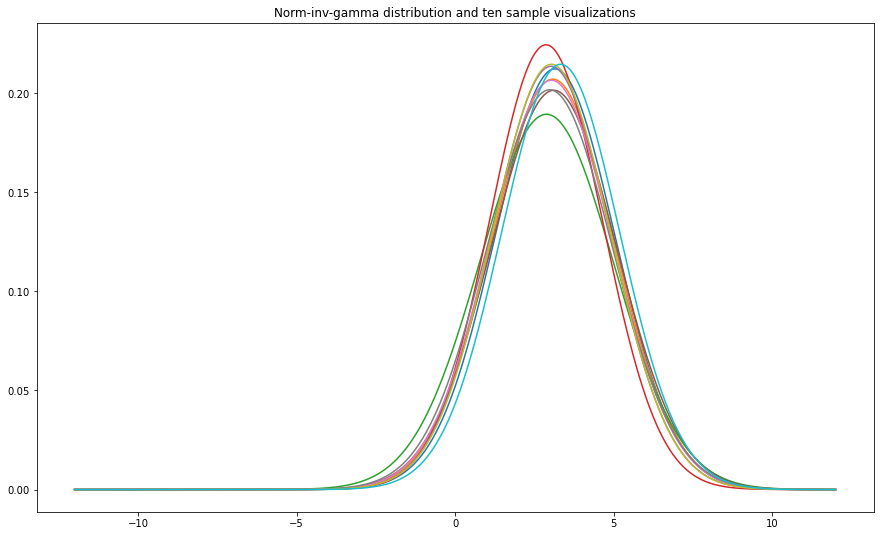

In [23]:
#now we need to conduct the plotting
plt.figure(figsize=(15, 9))
# we set the horizontal axis with linspace
horizontal_axis = np.linspace(-12, 12, 680)

#then we take the pdf in respect with our random 10 means that we observed above
for NEO in range(10):
    vertical_axis = sts.norm.pdf(horizontal_axis, loc=ten_means[NEO], scale=np.sqrt(ten_variances[NEO]))
    # we take the root of variances measure our scale and finally
    plt.plot(horizontal_axis, vertical_axis)
    # we plot the vertical and horizontal axis as required
    
plt.title('Norm-inv-gamma distribution and ten sample visualizations')
plt.show()


In [24]:
print('NOW WE SHALL OBTAIN THE 95 PERCENT CONFIDENCE INTERVALS FOR MEANS AND VARIANCES:')
print(f'For the means the 95 PERCENT CI is at {(np.percentile(ten_means, 2.5))} and at {np.percentile(ten_means, 97.5)}')

print(f'For the VARIANCES the 95 PERCENT CI is at {(np.percentile(ten_variances, 2.5))} and at {np.percentile(ten_variances, 97.5)}')


NOW WE SHALL OBTAIN THE 95 PERCENT CONFIDENCE INTERVALS FOR MEANS AND VARIANCES:
For the means the 95 PERCENT CI is at 2.871338012396109 and at 3.2892805426049465
For the VARIANCES the 95 PERCENT CI is at 3.224889711446094 and at 4.319191208420502


# TASK THREE: Log-normal SAMPLES 


In [25]:
#using the data given in prompt 
prompt_data_last = np.loadtxt("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv")

# summarizing the data
print(f'the total length of the dataset is {len(prompt_data_last)}')
print(f'the lowest value of the dataset is {min(prompt_data_last)}')
print(f'the highest value of the dataset is {max(prompt_data_last)}')

the total length of the dataset is 500
the lowest value of the dataset is 1.05182743421756
the highest value of the dataset is 28.9425775960553


In [26]:
#using the data given in the prompt
# and using the attached resource, we take the value of 
# the parameters and input the data we have in "LOGNORMAL DATA"
LOGNORMAL_data = {
    'prompt_new_data':{
        'alpha_given': 2,
        'beta_given': 5,
        'given_nu0': 0.1,
        'given_mu0': 2.3,      # inputting the given values
        'given_Data': prompt_data_last, 
        # storing all the necessary data
        'total_datapoints': len(prompt_data_last)
        # identifying the total number of datapoints we have and store
    }
}

In [27]:
#improvising our data from question 2 to make the Lognormal calculation model in Stan

LOGNORMAL_STAN = """
data {                             // In Stan, we will demonstrate three parts of our model,
                                   // the data part, the parameter part and the model
                                   // Together they complete our required model for analysis
    real<lower=0> alpha_given; 
    real<lower=0> beta_given;  
    real<lower=0> given_nu0;   
    real<lower=0> given_mu0;  
    int<lower=1> total_datapoints;  
    real given_Data[total_datapoints];  
}


parameters {
    real mn;    // we use the mean and variance as the parameters of the normal inverse gamma model
    real vari;   // here mn = mean and vari = variance  
}


model {                                           // according to the prompt, we take the inv gamma dist for
    vari ~ inv_gamma(alpha_given, beta_given);                                    // creating the model
    mn ~ normal(given_mu0, sqrt(vari / given_nu0));       //the mean is formed with normal dist
    for(cum in 1:total_datapoints) {
        given_Data[cum] ~ lognormal(mn, sqrt(vari)); // changing to log normal here
                                        // we create a FOR loop and
                                        // Multiply likelihood dist. with total_datapoints
                                        // finally creating three parts of the model and compiling them
                                        // NB: we used std. dev. because of Stan convention by using
                                        // sqrt function
    }
}
"""

In [28]:

# NOW WE COMPLETE COMPILATION OF OUR CREATED MODEL 

compiled_LOGNORMAL_stan = pystan.StanModel(model_code = LOGNORMAL_STAN)
#using pystan, we use the creating_stan to compile our model
# then we name it "compiled_INVERSE_stan"

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d9037d4efed1401b5ed351caffa35c5f NOW.
C:\Users\sadid\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\sadid\AppData\Local\Temp\tmpzdv2d8ro\stanfit4anon_model_d9037d4efed1401b5ed351caffa35c5f_6598123359611944074.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [29]:
#NOW WE STORE OUR RESULTS FROM CONDUCTING SAMPLING OF OUR MODEL

stored_LOGNORMAL_stan = compiled_LOGNORMAL_stan.sampling(data = LOGNORMAL_data['prompt_new_data'])

#we for posterior samples from our "alpha_given" and "beta_given parameters"
# and then compile results 

In [30]:
#time to show our results (LOGNORMAL VERSION)
print(stored_LOGNORMAL_stan)

Inference for Stan model: anon_model_d9037d4efed1401b5ed351caffa35c5f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mn     1.89  5.7e-4   0.03   1.83   1.87   1.89   1.91   1.95   3041    1.0
vari    0.5  6.1e-4   0.03   0.44   0.47   0.49   0.51   0.56   2528    1.0
lp__  -75.3    0.02   1.01 -78.02  -75.7 -74.99 -74.56 -74.33   1683    1.0

Samples were drawn using NUTS at Fri Feb 19 21:11:49 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [31]:
#for the posterior confidence interval of 95 percent in LOGNORMAL
print(stored_LOGNORMAL_stan.stansummary(probs=[0.025, 0.975], pars=['mn', 'vari']))
# we need to adjust the confidence interval for variance in our summary)
# here mn = mean and vari = variance

#we take the variance / mean and take the stansummary command to carry out the calculations

Inference for Stan model: anon_model_d9037d4efed1401b5ed351caffa35c5f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
mn     1.89  5.7e-4   0.03   1.83   1.95   3041    1.0
vari    0.5  6.1e-4   0.03   0.44   0.56   2528    1.0

Samples were drawn using NUTS at Fri Feb 19 21:11:49 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [1]:
#NOW THE 10 SAMPLES

In [33]:
#with these new results, we have to take samples
# according to the prompt
extracted_log_means = stored_LOGNORMAL_stan.extract('mn')
#at first we extract the means "mn" from the stored inverse stan results
# and store them in extracted means
extracted_log_variances = stored_LOGNORMAL_stan.extract('vari')
# then we do the same with variances stored as "vari"


ten_log_variances = extracted_log_variances['vari'][np.random.choice(range(3891), 10)]
#Then we randomly pick 10 variances from 3891 random choices with numpy
ten_log_means = extracted_log_means['mn'][np.random.choice(range(3891), 10)]
#Then we randomly pick 10 means from 3891 random choices with numpy

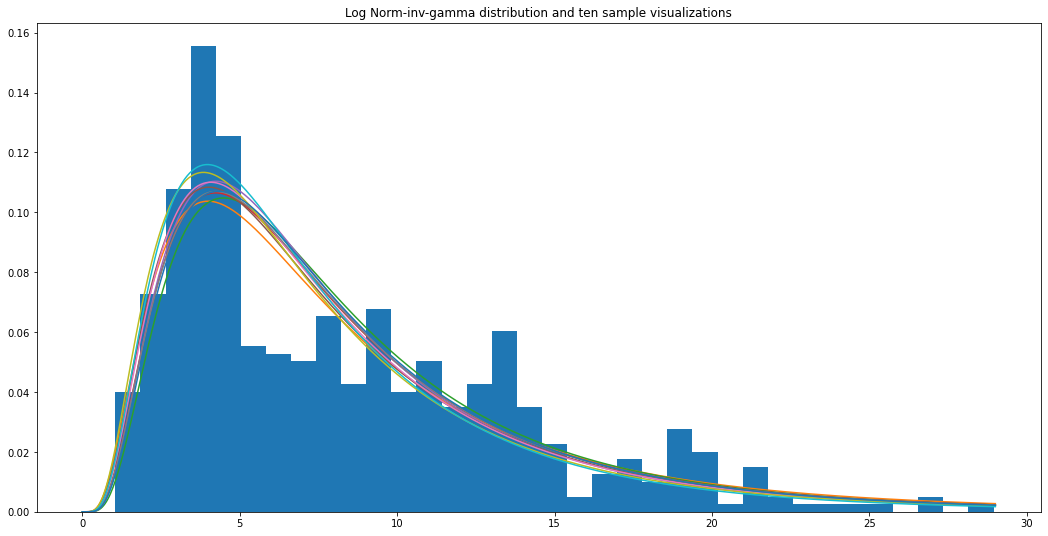

In [34]:
#setting the figure size
plt.figure(figsize=(18, 9))
#now we need to conduct the plotting
plt.hist(prompt_data_last, bins=35, density = True)
# we set the horizontal axis with linspace
horizontal_axis = np.linspace(0, 29, 680)

#then we take the pdf in respect with our random 10 means that we observed above
for NEO in range(10):
    vertical_axis = sts.lognorm.pdf(horizontal_axis, np.sqrt(ten_log_variances[NEO]), scale=np.exp(ten_log_means[NEO]))
    # we take the root of variances measure our scale and finally
    plt.plot(horizontal_axis, vertical_axis)
    # we plot the vertical and horizontal axis as required
    
plt.title('Log Norm-inv-gamma distribution and ten sample visualizations')
plt.show()


In [35]:
print('NOW WE SHALL OBTAIN THE 95 PERCENT CONFIDENCE INTERVALS FOR MEANS AND VARIANCES:')
print(f'For the means the 95 PERCENT CI is at {(np.percentile(ten_log_means, 2.5))} and at {np.percentile(ten_log_means, 97.5)}')

print(f'For the VARIANCES the 95 PERCENT CI is at {(np.percentile(ten_log_variances, 2.5))} and at {np.percentile(ten_log_variances, 97.5)}')

NOW WE SHALL OBTAIN THE 95 PERCENT CONFIDENCE INTERVALS FOR MEANS AND VARIANCES:
For the means the 95 PERCENT CI is at 1.8495553627741474 and at 1.9515279393871872
For the VARIANCES the 95 PERCENT CI is at 0.4562686955525202 and at 0.5321828344860301
